In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_titanic.csv')
# test = pd.read_csv('test.csv')
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
na_dropped = train.dropna(axis=1)
na_dropped.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [12]:
# brief info about the data
na_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [13]:
# feature extraction
# dropped unnecessary features from the dataset
fe = na_dropped.drop(['Ticket', 'Fare'], axis=1)
fe.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0


In [14]:
# renaming few columns and combining some as needed
fe['relatives_count'] = fe['SibSp'] + fe['Parch']
rn = fe
rn.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,relatives_count
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,0


In [15]:
# dropping more unnecessary columns
rn = rn.drop(['SibSp', 'Parch', 'Name'], axis=1)
rn.info()
rn.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      891 non-null    int64 
 1   Survived         891 non-null    int64 
 2   Pclass           891 non-null    int64 
 3   Sex              891 non-null    object
 4   relatives_count  891 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 34.9+ KB


,PassengerId,Survived,Pclass,Sex,relatives_count
0,1,0,3,male,1
1,2,1,1,female,1
2,3,1,3,female,0
3,4,1,1,female,1
4,5,0,3,male,0


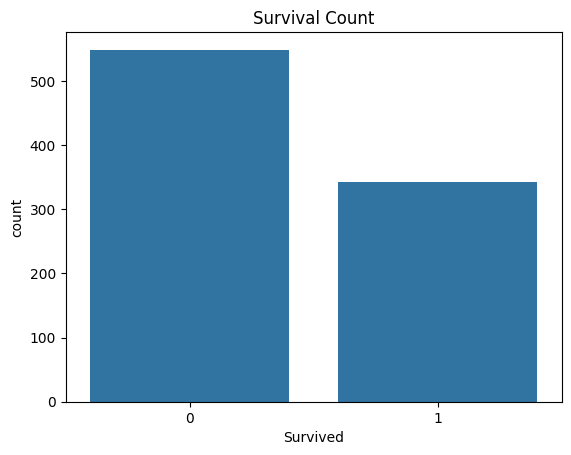

In [16]:
# visualization
sns.countplot(x='Survived', data=rn)
plt.title('Survival Count')
plt.show()


In [17]:
'''
exporting the final clean data to another csv file
to keep a backup of clean data and 
work on the clean data only, without any problem
'''
rn.to_csv("cleaned_train_titanic.csv", index = False)

In [30]:
# splitting train data into two data sets with 80% of it for training and 20% for testing
# this was done since we did not have any seperate testing data set and we just had a training data set
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_train_titanic.csv")
df = pd.get_dummies(df, columns=['Sex'])
# this was done to remove the value error that said, the Sex column was of an object data type
# and it was trying to convert it to float which is not possible so we had to do this encoding on that column
X = df.drop('Survived', axis=1)
y = df['Survived']
'''
X is the data that will be used to train the model hence survived col is not needed and is dropped
y is the target vetor...basically what we are trying to predict...survived or not in our case
'''
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

'''
random_state is a parameter used in many machine learning functions that have some element of randomness
by setting it to a fixed number, you can ensure that if you run your code again, you will get the same results
because as mentioned above, the data is shuffled everytime the model is trained and tested

test_size = 0.2 means that test data will get 20% of the main data and 80% will be for train data
so 0.3 will make it 30% and so on

xtrain and ytrain represent training data and label of training data respectively
xval and yval represent testing/validating data and true label of testing/validating data respectively

'''

In [31]:
# training the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

'''
model is a user declared and defined object of the RandomForestClassifier Class
X_train - training data
y_train - labels for training data
X_train would be all the features of the passengers (like age, sex, etc.)
y_train would be whether each passenger survived or not
'''

RandomForestClassifier()

In [32]:
# to evaluate the model
from sklearn.metrics import accuracy_score

predictions = model.predict(X_val)
print("Accuracy: ", accuracy_score(y_val, predictions).round(2))

'''
this accuracy rate in the output indicates that both the data, training and testing/validating,
are not sufficient or not enough to predict more accurately

more the data to train and test, higher will be the accuracy rate of the model prediction
'''

Accuracy:  0.78
